In [21]:
import catboost as cb
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from pathlib import Path
import optuna
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance
import shap

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams["axes.unicode_minus"]=False 

In [22]:
data=pd.read_csv('./use.csv')
train_data,test_data=train_test_split(data,test_size=0.2, random_state=1314)
feature=train_data.drop(['Sel','Unnamed: 0'],axis=1)
label=train_data['Sel']

In [23]:
data=pd.read_csv('./use_M.csv')
train_data,test_data_1=train_test_split(data,test_size=0.2, random_state=1314)
feature_1=train_data.drop(['Sel','Unnamed: 0'],axis=1)
label_1=train_data['Sel']

In [24]:
data=pd.read_csv('./use_N.csv')
train_data,test_data_2=train_test_split(data,test_size=0.2, random_state=1314)
feature_2=train_data.drop(['Sel','Unnamed: 0'],axis=1)
label_2=train_data['Sel']

In [25]:
kfold = KFold(n_splits = 5, random_state = 1314, shuffle = True)

In [66]:
model = cb.CatBoostRegressor(iterations=1000,max_depth=7,l2_leaf_reg=2.04534912107800673,
                             subsample=0.6,silent=True,random_state=1314,learning_rate=0.140355596209433626).fit(X=feature , y=label)
r2_score = cross_val_score(model, feature, label, cv=kfold, scoring='r2').mean()
rmse_score = pow(abs(cross_val_score(model, feature, label, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5)
print('r2:',r2_score)
print('rmse:',rmse_score)

r2: 0.8047642404871868
rmse: 9.47878568660501


In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_x = test_data.drop(['Sel','Unnamed: 0'],axis=1)
test_y = test_data['Sel']
print('r2:',r2_score(label,model.predict(feature)))
print('MAE:',pow(mean_squared_error(label,model.predict(feature)),0.5))
print('测试集得分为：', r2_score(test_y,model.predict(test_x)),pow(mean_squared_error(test_y,model.predict(test_x)),0.5))

r2: 0.9998122811877258
MAE: 0.2991702318089997
测试集得分为： 0.8041149322607346 9.486475976785156


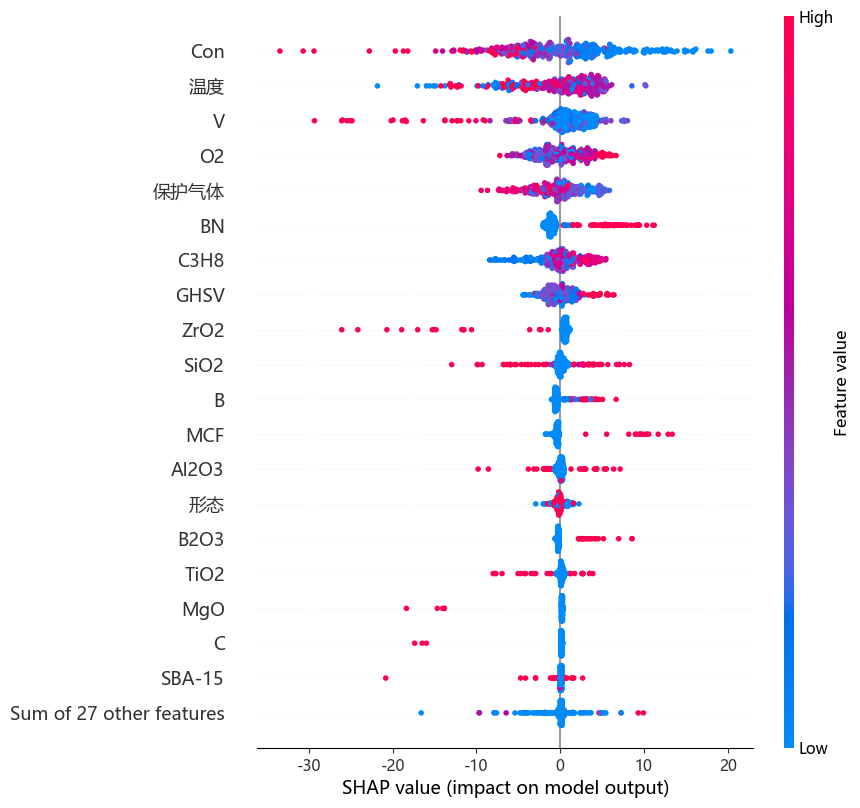

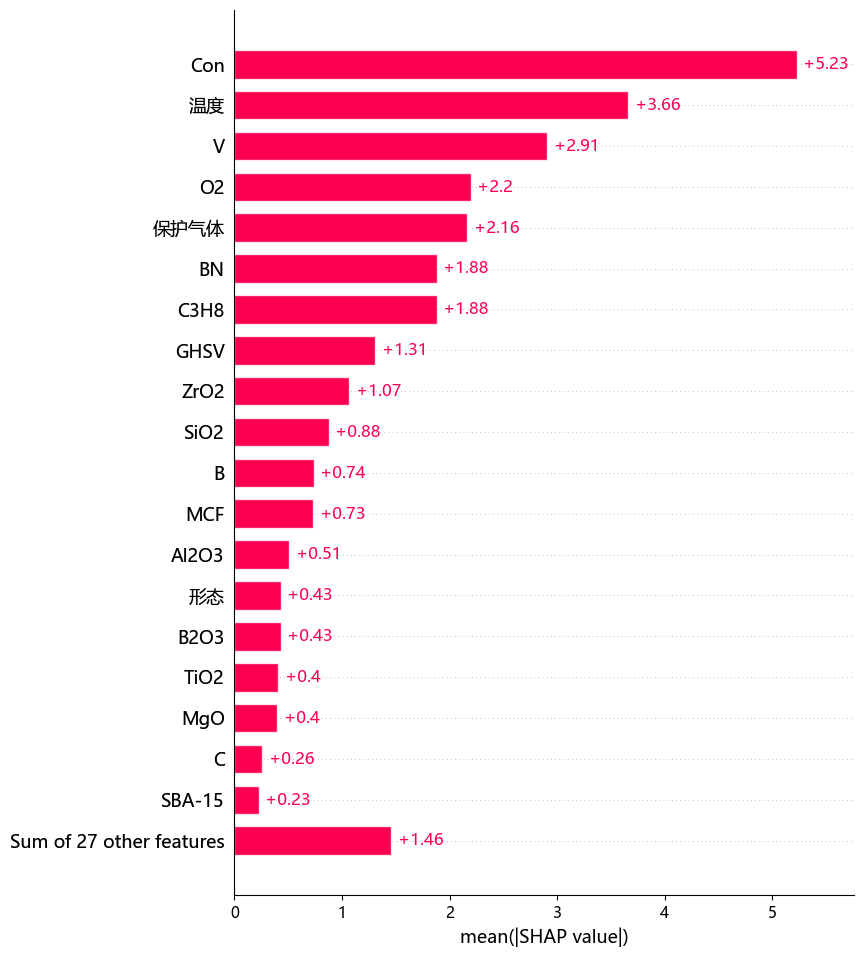

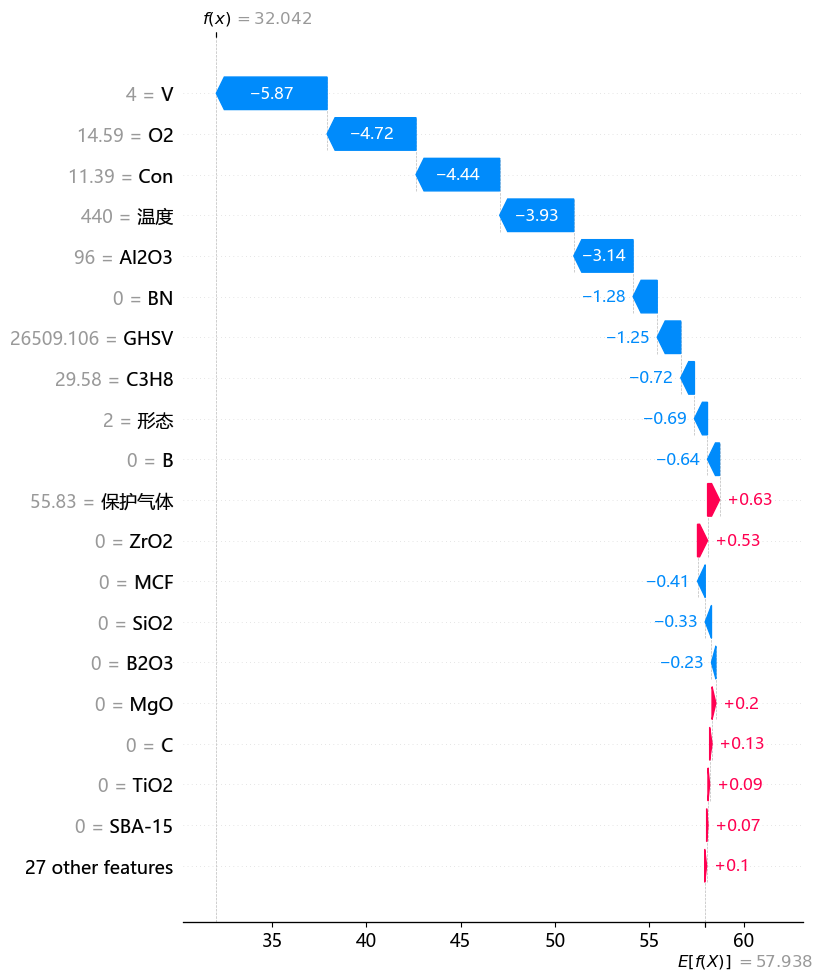

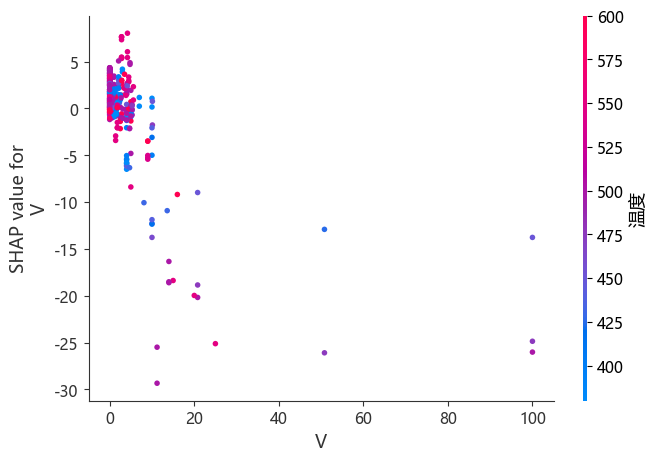

In [28]:
# shap提高解释性
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer(feature)
shap.plots.beeswarm(shap_values, max_display=20)
shap.plots.bar(shap_values, max_display=20)
shap.plots.waterfall(shap_values[0], max_display=20)
shap.plots.force(shap_values[0])
shap.force_plot(explainer.expected_value, shap_values.values, feature)
shap.dependence_plot("V", shap_values.values, feature, interaction_index='温度')

In [29]:
model = lgb.LGBMRegressor(random_state=1314,iterations=500,verbose=-1,
                        #   max_depth=21,
                        #   colsample_bytree=0.6996018516903802,subsample=0.360500873673603,
                          lambda_l2=3.6696821767896,learning_rate= 0.4135020975900916).fit(X=feature_1 , y=label_1)
r2_score = cross_val_score(model, feature_1, label_1, cv=kfold, scoring='r2').mean()
rmse_score = pow(abs(cross_val_score(model, feature_1, label_1, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5)
print('r2:',r2_score)
print('rmse:',rmse_score)

r2: 0.6088550820070077
rmse: 12.277742388760274


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_x = test_data_1.drop(['Sel','Unnamed: 0'],axis=1)
test_y = test_data_1['Sel']
print('r2:',r2_score(label_1,model.predict(feature_1)))
print('MAE:',pow(mean_squared_error(label_1,model.predict(feature_1)),0.5))
print('测试集得分为：', r2_score(test_y,model.predict(test_x)),pow(mean_squared_error(test_y,model.predict(test_x)),0.5))
pred_1=model.predict(test_x)

r2: 0.9446484163319719
MAE: 4.63168250485067
测试集得分为： 0.6212438094931035 11.29545714304936


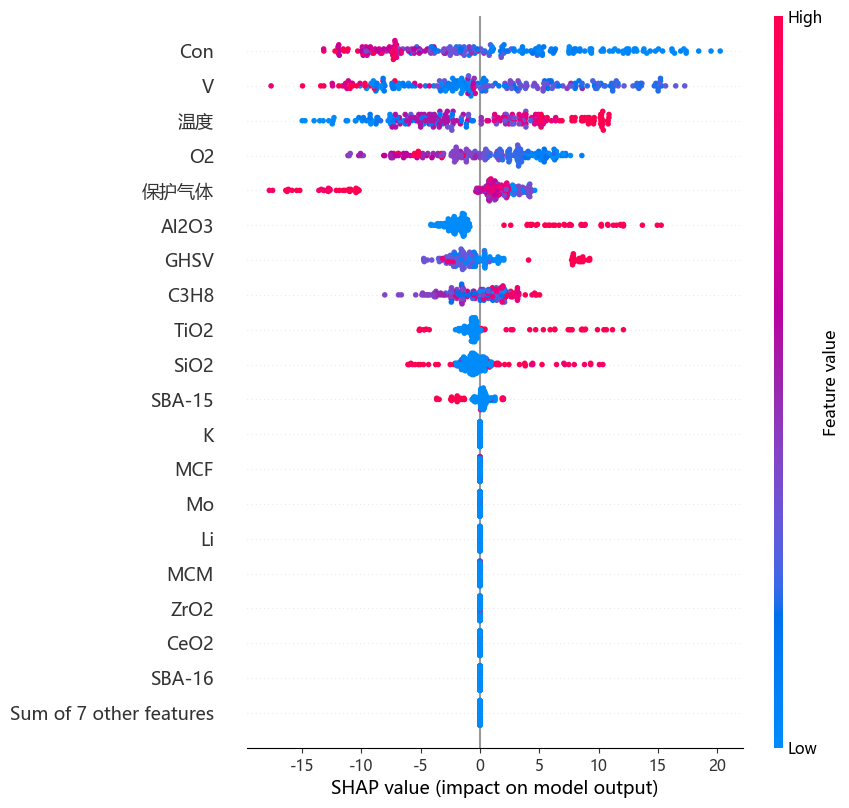

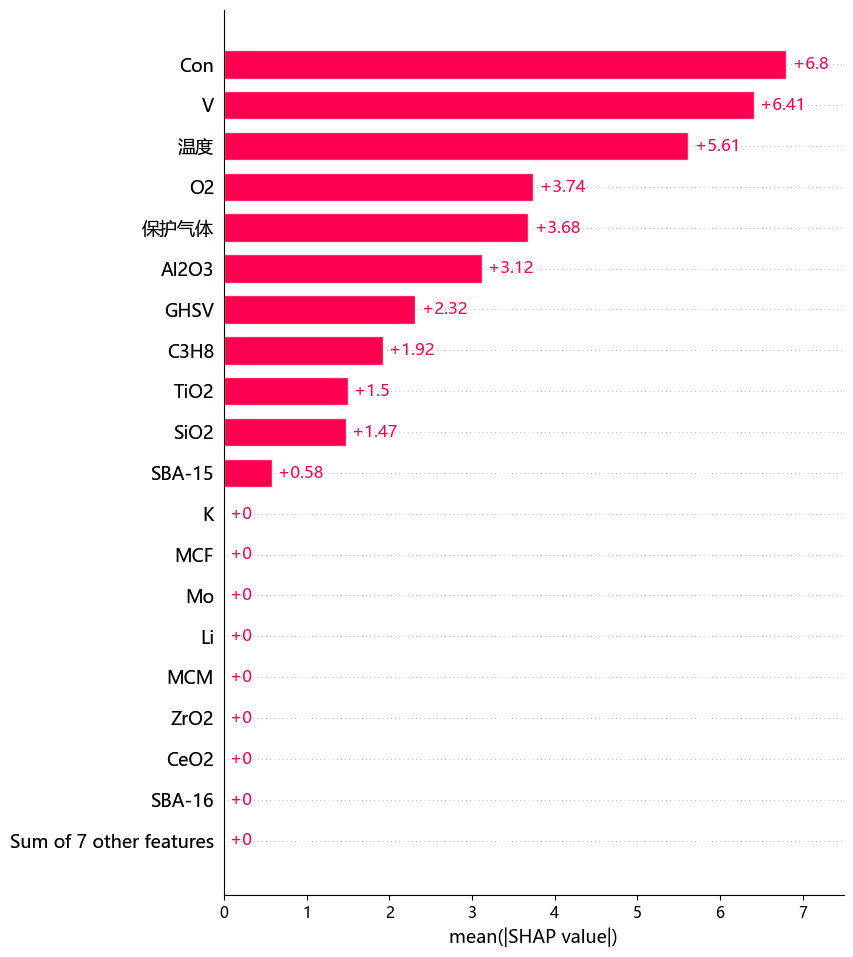

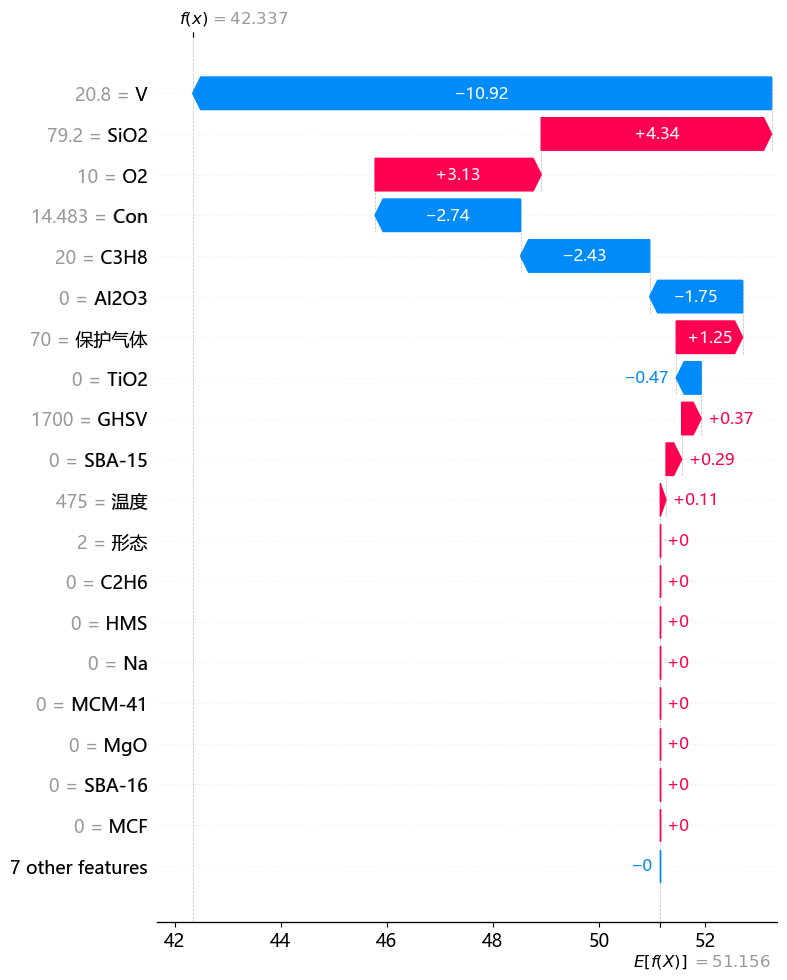

In [31]:
# shap提高解释性
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer(feature_1)
shap.plots.beeswarm(shap_values, max_display=20)
shap.plots.bar(shap_values, max_display=20)
shap.plots.waterfall(shap_values[0], max_display=20)
shap.plots.force(shap_values[0])
# shap.force_plot(explainer.expected_value, shap_values.values, feature)
# shap.dependence_plot("V", shap_values.values, feature, interaction_index='温度')

In [32]:
model = ExtraTreesRegressor(n_estimators=100,
                            max_leaf_nodes=10000,
                            random_state=1314).fit(X=feature_2 , y=label_2)
r2_score = cross_val_score(model, feature_2, label_2, cv=kfold, scoring='r2').mean()
rmse_score = pow(abs(cross_val_score(model, feature_2, label_2, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5)
print('r2:',r2_score)
print('rmse:',rmse_score)

r2: 0.7652079261694096
rmse: 10.065688301924414


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_x = test_data_2.drop(['Sel','Unnamed: 0'],axis=1)
test_y = test_data_2['Sel']
print('r2:',r2_score(label_2,model.predict(feature_2)))
print('MAE:',pow(mean_squared_error(label_2,model.predict(feature_2)),0.5))
print('测试集得分为：', r2_score(test_y,model.predict(test_x)),pow(mean_squared_error(test_y,model.predict(test_x)),0.5))
pred_2=model.predict(test_x)

r2: 0.9999760736586774
MAE: 0.10232890201933018
测试集得分为： 0.9016505896453564 7.1585040307548455


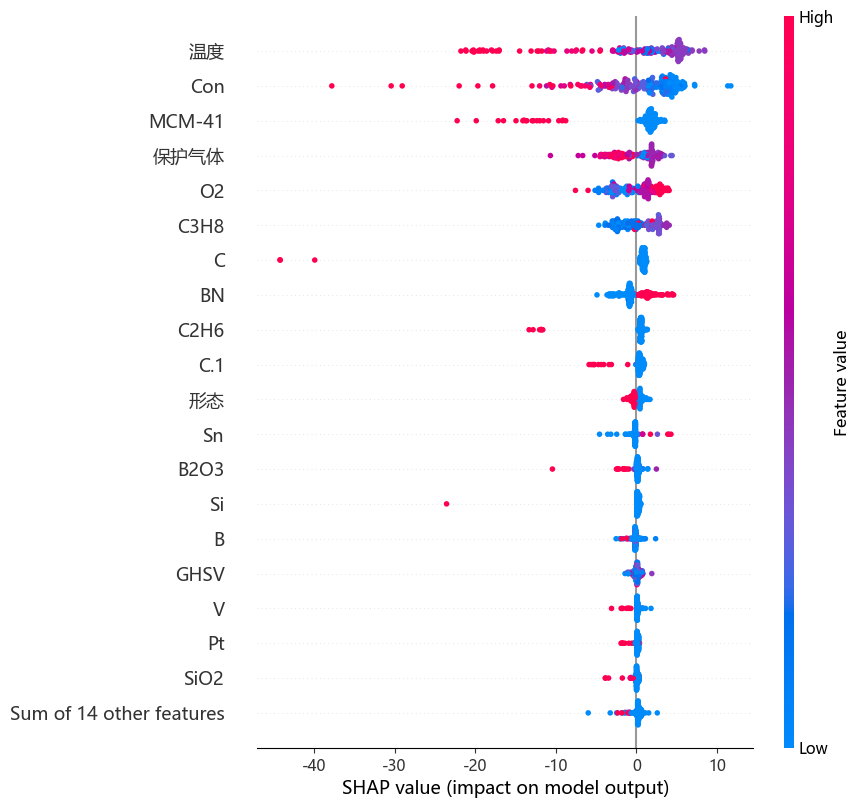

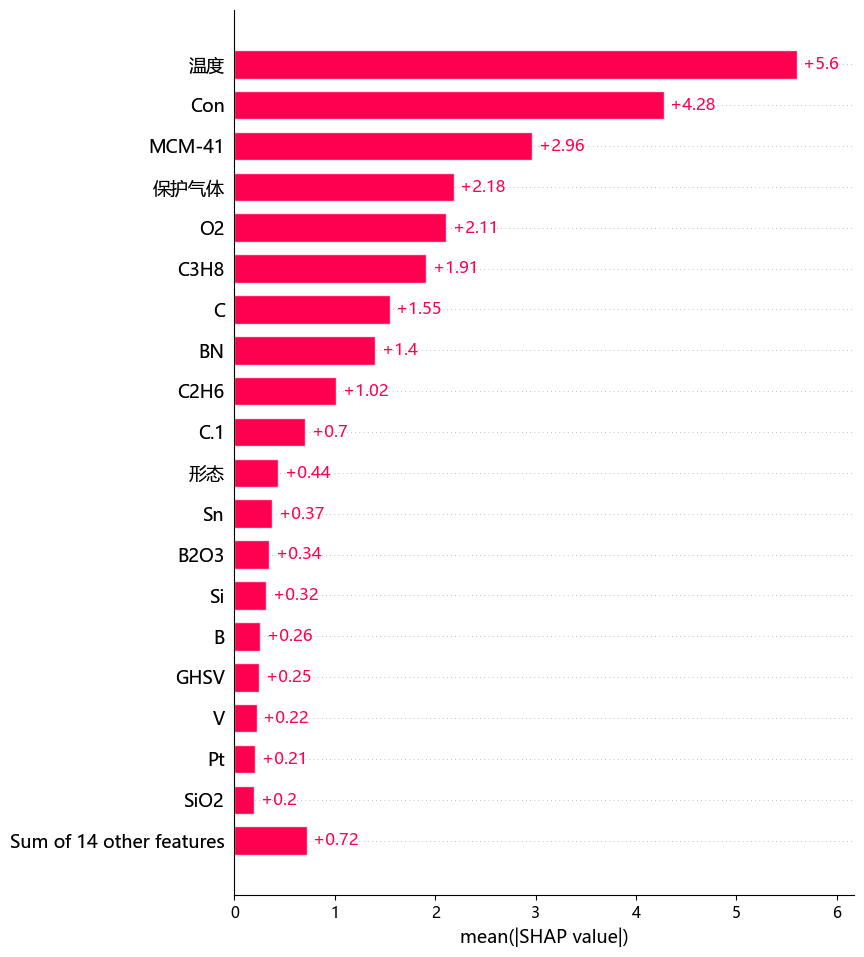

In [34]:
# shap提高解释性
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer(feature_2)
shap.plots.beeswarm(shap_values, max_display=20)
shap.plots.bar(shap_values, max_display=20)
# shap.plots.waterfall(shap_values[0], max_display=20)
# shap.plots.force(shap_values[0])
# shap.force_plot(explainer.expected_value, shap_values.values, feature)
# shap.dependence_plot("V", shap_values.values, feature, interaction_index='温度')

In [59]:
import numpy as np
np1=np.concatenate([pred_1,pred_2],axis=0)
np1

array([[56.53477929],
       [53.84258462],
       [63.67596968],
       [60.27966036],
       [65.55531643],
       [63.76099369],
       [64.14637715],
       [62.62545418],
       [60.64401762],
       [47.86643716],
       [75.13527921],
       [49.57662548],
       [38.59000286],
       [64.34050583],
       [40.72794505],
       [27.78437267],
       [41.46366695],
       [65.06766022],
       [40.42396996],
       [43.67500141],
       [32.64164332],
       [34.43594748],
       [74.52758382],
       [82.77646417],
       [35.1774319 ],
       [38.07591743],
       [50.80569002],
       [47.44575069],
       [32.52670137],
       [68.49069645],
       [47.44575069],
       [34.44210614],
       [49.70284498],
       [28.9251338 ],
       [65.04389945],
       [52.04642198],
       [35.97644305],
       [59.74554445],
       [63.44194556],
       [55.71648768],
       [41.20828357],
       [60.42935769],
       [58.26870144],
       [43.50852941],
       [49.03940249],
       [31

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# test_x = pd.concat([test_data_2.drop(['Sel','Unnamed: 0'],axis=1),test_data_2.drop(['Sel','Unnamed: 0'],axis=1)],axis=1)
test_y = pd.concat([test_data_1['Sel'],test_data_2['Sel']],axis=1)
t_1=test_data_1['Sel'].to_numpy()
t_2=test_data_2['Sel'].to_numpy()
t=np.concatenate([t_1,t_2],axis=0)
t

# test = pd.concat([pred_1,pred_2],axis=1)
# test_y

array([72. , 57.5, 31.8, 56. , 60. , 67. , 66. , 72. , 75. , 52. , 76. ,
       69. , 43.1, 54.3, 25. , 45.4, 22.6, 62. , 41.4, 22.6, 15.1, 26.7,
       78. , 79.5, 39. , 55. , 62.5, 48. , 30. , 89.2, 41. , 43.9, 44. ,
       25.7, 57.1, 50. , 24.8, 76. , 57.5, 59.5, 36.1, 54.9, 70. , 32. ,
       42. , 41. , 39.8, 52. , 72.7, 31. , 31. , 26. , 54. , 14.4, 64. ,
       67.1, 39. , 79.2, 47. , 76.5, 86.2, 86.2, 71.2, 75. , 76.5, 79.4,
       59.4, 83.6, 97.4, 43. , 77.9, 48. , 40. , 40. , 15. , 60.9, 53. ,
       73. , 86. , 34. , 78. , 54.9, 84.5, 50. , 93. , 38. ,  9. , 88. ,
       86. , 92. , 34. , 88.3, 49. , 86. , 60. , 79.8, 40. , 89.3, 68. ,
       23. , 87.4, 88.7, 36. ])

In [61]:

# print('r2:',r2_score(label_2,model.predict(feature_2)))
# print('MAE:',pow(mean_squared_error(label_2,model.predict(feature_2)),0.5))
print('测试集得分为：', r2_score(np1,t),pow(mean_squared_error(np1,t),0.5))

测试集得分为： 0.7510860936609098 9.592181789067597
